<a href="https://colab.research.google.com/github/nandaKishore536/stock-price-prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance pandas numpy matplotlib scikit-learn


Import Libraries

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


 Fetch Stock Data

In [10]:
stock = yf.download('TATAMOTORS.NS', start='2020-01-01', end='2024-12-31')
stock.head()


/tmp/ipython-input-10-4081679000.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download('TATAMOTORS.NS', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,
2020-01-01,181.748566,183.965612,180.911024,182.438311,25968357
2020-01-02,190.912384,191.848468,181.896399,182.290534,57289863
2020-01-03,188.301193,192.784543,186.478282,190.074819,47572728
2020-01-06,182.931000,188.202651,182.339796,188.202651,28621212
2020-01-07,181.994919,186.626081,179.630075,184.261237,34995035


Prepare Data

In [5]:
stock['Prediction'] = stock['Close'].shift(-1)
X = np.array(stock[['Close']])[:-1]
y = np.array(stock['Prediction'])[:-1]


Train & Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Model Training

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make Predictions

In [8]:
predictions = model.predict(X_test)
print("Predictions:", predictions[:5])
print("Actual:", y_test[:5])


Predictions: [ 871.17853383  968.57657201 1083.08843151  182.66814125  470.29510887]
Actual: [ 835.56591797  974.78497314 1068.06689453  190.91238403  470.5559082 ]


Visualize

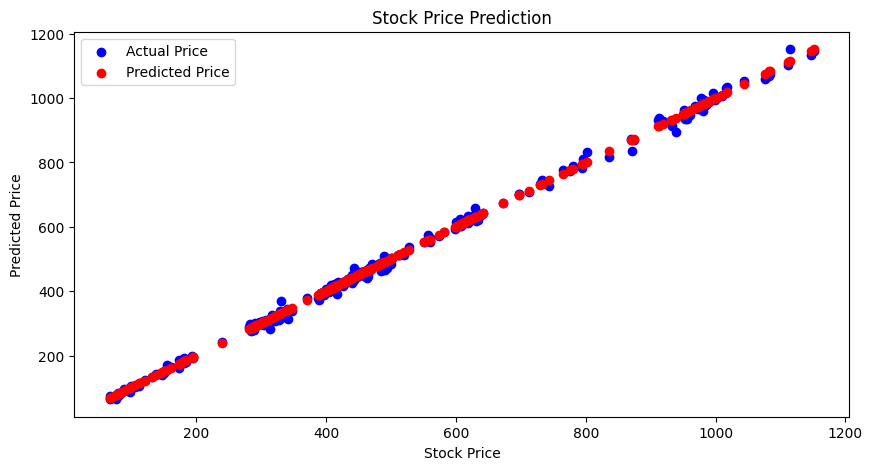

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.scatter(X_test, predictions, color='red', label='Predicted Price')
plt.xlabel('Stock Price')
plt.ylabel('Predicted Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()
